<a href="https://colab.research.google.com/github/Geevanandam/Health-Assignment/blob/main/Syntactic_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

In [ ]:
!pip install pycrf
!pip install sklearn-crfsuite
!pip install pandas
!pip install matplotlib
!pip install spacy
!python -m spacy download en_core_web_sm

import pandas as pd
import matplotlib.pyplot as plt
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics, CRF

model = spacy.load("en_core_web_sm")


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\nagen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\nagen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\nagen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\nagen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\nagen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 991.0 kB/s eta 0:00:13
     ---------------------------------------- 0.1/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 7.4 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 12.5 MB/s eta 0:00:01
     ------------ --------------------------- 3.9/12.8 MB 14.8 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 16.8 MB/s eta 0:00:01
     ------------------- -------------------- 6.4/12.8 MB 17.7 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 19.5 MB/s eta 0:00:01
     ---------------------------- ----------- 9.3/12.8 MB 20.4 MB/s eta 0:00:01
     --------------------------------- ----- 11.0/12.8 MB 29.7 MB/s eta 0:00:01
     --------------------------------------  12.7/1


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\nagen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line.
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

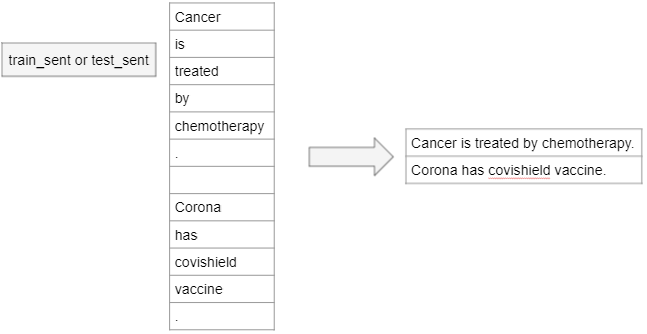

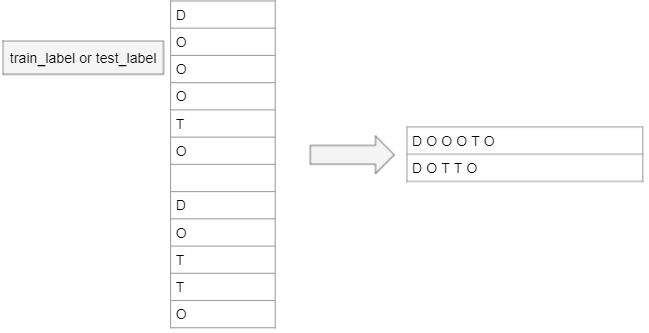

In [ ]:
# This function extracts sentences from the given file based on the separator.
def sentence_extract(filepath='',sep=' '):
    try:
        with open (filepath,'r',encoding='utf-8') as file_text:
            if file_text.mode  == 'r':
                file_content = file_text.readlines()
        sentences = []
        each_sentence=''
        for char in file_content:
            # stripping end of line char
            content_word = char.strip('\n')
            if content_word == '':
                # Line break found. Append the sentence to the sentence list
                sentences.append(each_sentence.strip(' '))
                each_sentence=''
            else:
                # forming sentence
                each_sentence += content_word + ' '

        print('Total number of sentences: ',len(sentences),'\n')
        print('*'*50)
        print('Top 5 sentences in the sentences list:\n',sentences[:5])
        return sentences
    except FileNotFoundError:
        print('File not found.')

### Count the number of sentences in the processed train and test dataset

In [ ]:
# Creating and getting the count of sentences in TRAIN Dataset
train_sent = sentence_extract(filepath='train_sent',sep='\n')

# Also printing first five records

Total number of sentences:  2599 

**************************************************
Top 5 sentences in the sentences list:
 ['All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )', 'The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )', 'Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )', "The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )", "Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )"]


In [ ]:
# Creating and getting the count of sentences in TEST Dataset
test_sent = sentence_extract(filepath='test_sent',sep='\n')

Total number of sentences:  1056 

**************************************************
Top 5 sentences in the sentences list:
 ['Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )', 'As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration', 'The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period', 'There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )', 'Fluctuations in ambient temperature are inversely correlated to changes in AFI']


### Count the number of lines of labels in the processed train and test dataset.

In [ ]:
# Creating and getting the count of number of lines of labels in TRAIN Dataset
train_label = sentence_extract(filepath='train_label',sep='\n')

Total number of sentences:  2599 

**************************************************
Top 5 sentences in the sentences list:
 ['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O']


In [ ]:
# Creating and getting the count of number of lines of labels in TEST Dataset
test_label = sentence_extract(filepath='test_label',sep='\n')

Total number of sentences:  1056 

**************************************************
Top 5 sentences in the sentences list:
 ['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O', 'O O O O O O O O O O O']


##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging.



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [ ]:
# Creating empty Train and Test dataframes for POS, Lemma tagging along with Labels
train_df = pd.DataFrame(columns=['SENTENCE','WORD','POS','LEMMA','LABEL'])
test_df = pd.DataFrame(columns=['SENTENCE','WORD','POS','LEMMA','LABEL'])

In [ ]:
# Tokenizing Train datframe

nlp= spacy.load("en_core_web_sm")

i=0
j=0
# for each sentence
for sent, label in zip(train_sent, train_label):
    i+=1
    # for each word in a sentence
    for word, lbl in zip(sent.split(), label.split()):
        doc = nlp(word)
        for tokn in doc:
            train_df.loc[j,['SENTENCE','WORD','POS','LEMMA','LABEL']] = [i,tokn.text,tokn.pos_,tokn.lemma_,lbl]
            j+=1

In [ ]:
# Tokenizing Test datframe

i=0
j=0
# for each sentence
for sent, label in zip(test_sent, test_label):
    i+=1
    # for each word in a sentence
    for word,lbl in zip(sent.split(),label.split()):
        doc = nlp(word)
        for tokn in doc:
            test_df.loc[j,['SENTENCE','WORD','POS','LEMMA','LABEL']] = [i,tokn.text,tokn.pos_,tokn.lemma_,lbl]
            j+=1

In [ ]:
# Concatenating TRAIN and TEST dataframes to find the top 25 most common tokens
combined_data = pd.concat((train_df,test_df),axis=0)
# Resetting index
combined_data.reset_index(inplace=True,drop=True)

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [ ]:
top_25 = combined_data[(combined_data['POS'] == 'NOUN') | ((combined_data['POS'] == 'PROPN'))]['WORD'].value_counts()[:25]
top_25

WORD
patients        492
treatment       281
cancer          200
therapy         175
study           162
disease         143
cell            140
lung            116
group            94
chemotherapy     88
gene             88
effects          85
results          79
use              78
women            77
patient          75
surgery          71
risk             71
cases            71
analysis         70
rate             67
human            67
response         66
survival         65
children         64
Name: count, dtype: int64

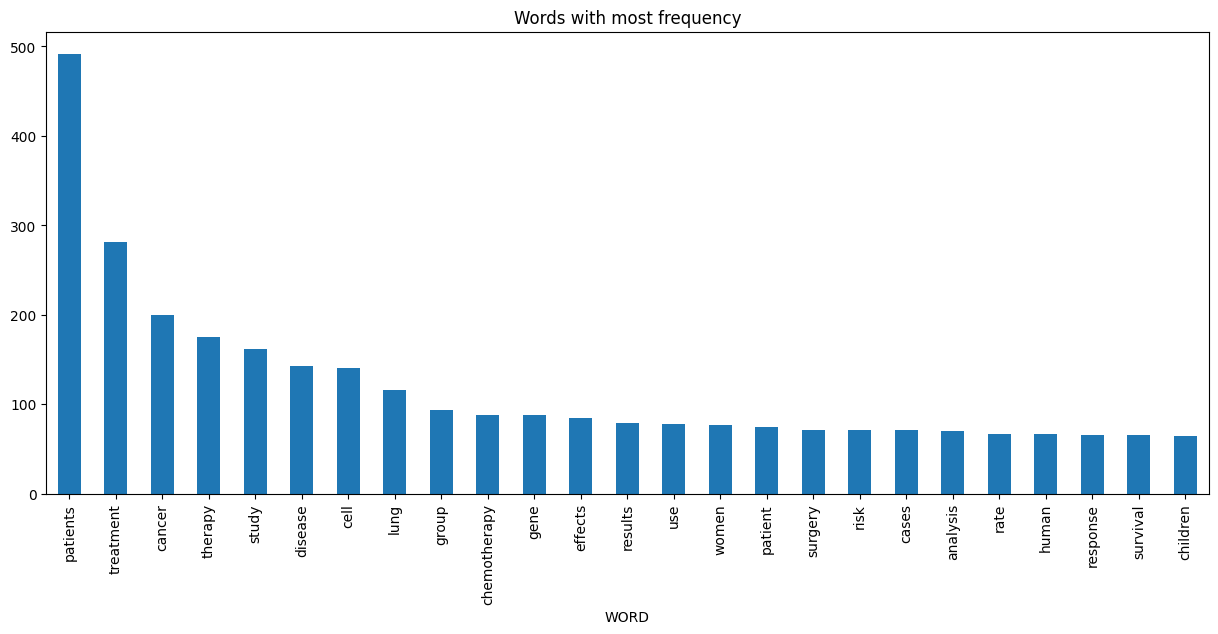

In [ ]:
# plotting most frequent words for EDA
plt.figure(figsize=(15,6))
ax = top_25.plot.bar()
ax.set_title('Words with most frequency')
plt.show()

In [ ]:
 # Print the top 25 most common LEMMA words with NOUN and Proper noun POS tags
top_25_lemma = combined_data[(combined_data['POS'] == 'NOUN') | ((combined_data['POS'] == 'PROPN'))]['LEMMA'].value_counts()[:25]
top_25_lemma

LEMMA
patient         587
treatment       316
study           227
cancer          226
cell            203
therapy         182
effect          182
disease         172
case            131
group           128
lung            120
result          118
gene            112
year            105
rate            103
method           96
trial            91
chemotherapy     91
woman            89
analysis         86
human            85
protein          82
response         81
use              78
risk             78
Name: count, dtype: int64

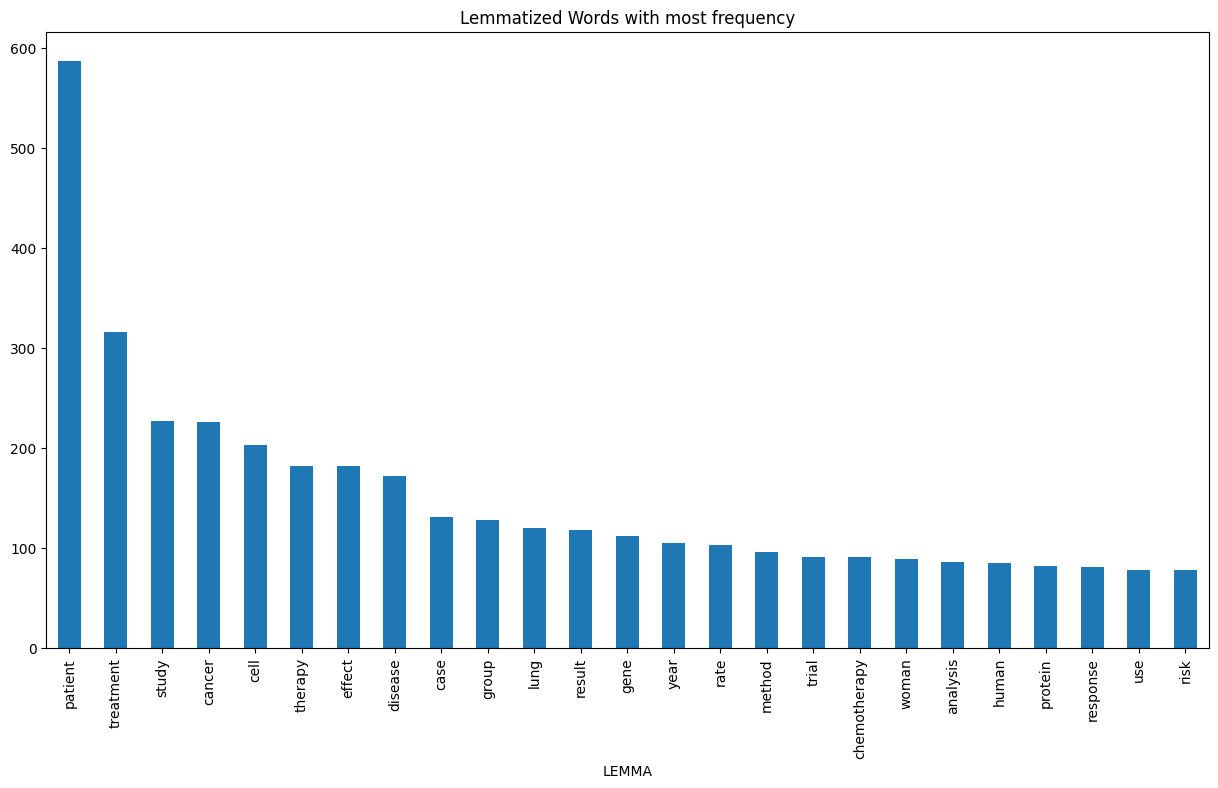

In [ ]:
# plotting most frequent words for EDA
plt.figure(figsize=(15,8))
ax = top_25_lemma.plot.bar()
ax.set_title('Lemmatized Words with most frequency')
plt.show()

### OBSERVATION:
- From both the graphs looks like the data is mostly for cancer and chemotherapy, followed by surgery are the most sought after Treatment
- The data also shows diseases mostly in women followed by children
- Most common organ affected is lungs

In [ ]:
# Train dataframe with tokens
train_df.head()

,SENTENCE,WORD,POS,LEMMA,LABEL
0,1,All,ADV,all,O
1,1,live,ADJ,live,O
2,1,births,NOUN,birth,O
3,1,>,PUNCT,>,O
4,1,or,CCONJ,or,O


In [ ]:
# Test dataframe with tokens
test_df.head()

,SENTENCE,WORD,POS,LEMMA,LABEL
0,1,Furthermore,ADV,furthermore,O
1,1,",",PUNCT,",",O
2,1,when,SCONJ,when,O
3,1,all,PRON,all,O
4,1,deliveries,NOUN,delivery,O


## Defining features for CRF





In [ ]:
# Let's define the features to get the feature value for one word.

def Features_From_Word(sentence, pos, pos_tags):
  word = sentence[pos]

  features = [
    'word.lower=' + word.lower(), # id for the word
    'word[-2:]=' + word[-2:],     # last 2 characters
    'word[-3:]=' + word[-3:],     # last 3 characters
    'word.isupper=%s' % word.isupper(),  # is uppercase
    'word.isdigit=%s' % word.isdigit(),  # is number
    'word.startsWithCapital=%s' % word[0].isupper(), # starts with Capital
    'word.pos=' + pos_tags[pos], # pos tag
    'word.pos_isnoun=%s' % (pos_tags[pos] in ['NOUN','PROPN'])
  ]

  # previous word features
  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.lower=' + prev_word.lower(),
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_word.startsWithCapital=%s' % prev_word[0].isupper(),
    'prev_word.pos=' + pos_tags[pos-1],
    'prev_word.pos_isnoun=%s' % (pos_tags[pos] in ['NOUN','PROPN'])
  ])
  # marking beginning and end of sentences
  else:
    features.append('BEG') # feature for beginning of sentence

  if(pos == len(sentence)-1):
    features.append('END') # feature for end of sentence

  return features


## Getting the features

### Write a code/function to get the features for a sentence

In [ ]:
# Write a code to get features for a sentence.
def Features_From_Sentence(sentence):

    # We need to get the pos_tags to be passed to the function
    tokenized_sentence = nlp(sentence)
    postags = []

    for each_tokn in tokenized_sentence:
        postags.append(each_tokn.pos_)

    sentence_list = sentence.split()
    return [Features_From_Word(sentence_list, pos, postags) for pos in range(len(sentence_list))]


### Write a code/function to get the labels of a sentence

In [ ]:
# Write a code to get the labels for a sentence.
def Labels_From_Sentence(labels):
  return labels.split()

In [ ]:
# Call function 'Features_From_Sentence' to get features for first sentence in train_sentences
example_sentence = train_sent[0]
print(example_sentence)

features = Features_From_Sentence(example_sentence)

# checking if features are extracted correctly for 3rd word in first sentence of train dataset
features[2]

All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )


['word.lower=births',
 'word[-2:]=hs',
 'word[-3:]=ths',
 'word.isupper=False',
 'word.isdigit=False',
 'word.startsWithCapital=False',
 'word.pos=NOUN',
 'word.pos_isnoun=True',
 'prev_word.lower=live',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_word.startsWithCapital=False',
 'prev_word.pos=ADJ',
 'prev_word.pos_isnoun=True']

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset

In [ ]:
X_train = [Features_From_Sentence(sentence) for sentence in train_sent]
X_test = [Features_From_Sentence(sentence) for sentence in test_sent]

In [ ]:
# checking X_train and X_test
print(X_train[0][:3])
print(X_test[0][:3])

[['word.lower=all', 'word[-2:]=ll', 'word[-3:]=All', 'word.isupper=False', 'word.isdigit=False', 'word.startsWithCapital=True', 'word.pos=DET', 'word.pos_isnoun=False', 'BEG'], ['word.lower=live', 'word[-2:]=ve', 'word[-3:]=ive', 'word.isupper=False', 'word.isdigit=False', 'word.startsWithCapital=False', 'word.pos=ADJ', 'word.pos_isnoun=False', 'prev_word.lower=all', 'prev_word.isupper=False', 'prev_word.isdigit=False', 'prev_word.startsWithCapital=True', 'prev_word.pos=DET', 'prev_word.pos_isnoun=False'], ['word.lower=births', 'word[-2:]=hs', 'word[-3:]=ths', 'word.isupper=False', 'word.isdigit=False', 'word.startsWithCapital=False', 'word.pos=NOUN', 'word.pos_isnoun=True', 'prev_word.lower=live', 'prev_word.isupper=False', 'prev_word.isdigit=False', 'prev_word.startsWithCapital=False', 'prev_word.pos=ADJ', 'prev_word.pos_isnoun=True']]
[['word.lower=furthermore', 'word[-2:]=re', 'word[-3:]=ore', 'word.isupper=False', 'word.isdigit=False', 'word.startsWithCapital=True', 'word.pos=ADV'

### Define the labels as the target variable for test and the train dataset

In [ ]:
Y_train = [Labels_From_Sentence(labels) for labels in train_label]
Y_test = [Labels_From_Sentence(labels) for labels in test_label]

In [ ]:
# checking Y_train and Y_test
print(Y_train[0][:3])
print(Y_test[0][:3])

['O', 'O', 'O']
['O', 'O', 'O']


## Build the CRF Model

In [ ]:
# Building the CRF model with max iteration 100
# Regularization term c1 and c2 are chosen as 1.0 and 0.01 after many experimentation for the best results based on F1 score
crf = CRF(max_iterations=100, c1=1.0, c2=0.01, all_possible_transitions=False)

# fit the model
try:
    crf.fit(X_train, Y_train)
except AttributeError:
    pass

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [ ]:
Y_pred = crf.predict(X_test)


### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [ ]:
# Calculate the f1 score using the test data
f1_score = metrics.flat_f1_score(Y_test, Y_pred, average='weighted')
print('F1-score for Medical NER Dataset : {0} % '.format(round(f1_score*100,2)))

F1-score for Medical NER Dataset : 91.43 % 


In [ ]:
# Calculate the f1 score using the test data
precision = metrics.flat_precision_score(Y_test, Y_pred, average='weighted')
recall  = metrics.flat_recall_score(Y_test, Y_pred, average='weighted')
accuracy = metrics.flat_accuracy_score(Y_test, Y_pred)
print('Precision score for Medical NER Dataset : {0} % '.format(round(precision*100,2)))
print('Recall score for Medical NER Dataset : {0} % '.format(round(recall*100,2)))
print('Accuracy score for Medical NER Dataset : {0} % '.format(round(accuracy*100,2)))

Precision score for Medical NER Dataset : 91.36 % 
Recall score for Medical NER Dataset : 92.01 % 
Accuracy score for Medical NER Dataset : 92.01 % 


##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

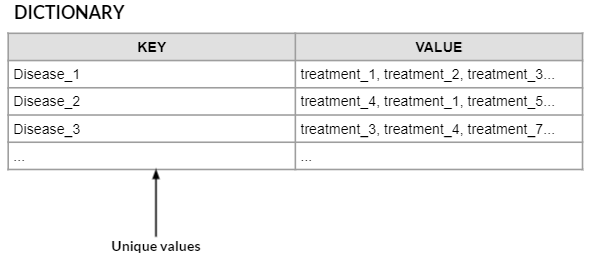

In [ ]:
print(Y_pred)

[list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])
 list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])
 list(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])
 ... list(['T', 'T', 'T', 'T', 'T', 'T', 'O', 'D', 'D', 'D'])
 list(['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'D'])
 list(['O', 'O', 'O', 'O', 'O', 'O', 'O'])]


In [ ]:
# Creating dictionary for the diseases and recommended Treatments for the same
DiseaseTreatment_dict = dict()

for i in range(len(Y_pred)):

    # tag of each sentence as per prediction
    DTO_tag = Y_pred[i]
    Diseases = ""
    Treatments = ""

    # Iterating over DTO tag of each word in a sentence
    # to obtain Disease and Treatment from it
    for j in range(len(DTO_tag)):
        if DTO_tag[j] == 'D': # for obtaining Disease
            Diseases += test_sent[i].split()[j] + " "
        elif DTO_tag[j] == 'T': # for obtaining Treatment
            Treatments += test_sent[i].split()[j] + " "

    # Removing extra white space
    Diseases = Diseases.lstrip().rstrip()
    Treatments = Treatments.lstrip().rstrip()

    # Adding Disease and Treatments to dictionary
    if Diseases != "" and Treatments != "":
        if Diseases in DiseaseTreatment_dict.keys(): # disease key already present
            treatment_out = list([Diseases])
            treatment_out.append(Treatments)   # append treatment
            DiseaseTreatment_dict[Diseases] = treatment_out
        elif Diseases not in DiseaseTreatment_dict.keys(): # adding disease and treatment if not present in dictionary
            DiseaseTreatment_dict[Diseases] = Treatments

In [ ]:
# lets view some records from Dictionary
Disease_Treatment_df = pd.DataFrame(columns=['Diseases','Treatment'])
i = 0
for k, v in DiseaseTreatment_dict.items():
  l = [k, v]
  Disease_Treatment_df.loc[len(Disease_Treatment_df.index)] = l
Disease_Treatment_df.head(5)

,Diseases,Treatment
0,gestational diabetes,good glycemic control
1,hereditary retinoblastoma,radiotherapy
2,epilepsy,Methylphenidate
3,unstable angina or non-Q-wave myocardial infar...,roxithromycin
4,coronary-artery disease,Antichlamydial antibiotics


### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [ ]:
disease = 'hereditary retinoblastoma'
print("Treatment for Disease '"+ disease+ "' is '"+ DiseaseTreatment_dict[disease]+"'")

Treatment for Disease 'hereditary retinoblastoma' is 'radiotherapy'
